# Importy

In [1]:
!python --version

Python 3.12.0


In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [3]:
os.getcwd()

'c:\\Users\\klips\\Documents\\PJATK\\7 - Zimowy\\SUML\\suml-lab-ClipLee'

# Zadanie 1

*Załaduj ponownie zbiór danych (DSP_6.csv), ale nie wykonuj jeszcze operacji na brakujących wartościach. Poszukaj innego sposobu wyświetlenia informacji o brakujących wartościach -wyświetl liczbę brakujących danych.*

In [4]:
df = pd.read_csv("Lab03/datasets/DSP_6.csv", sep=";")

In [5]:
print('Sposob isnull: ', df.isnull().sum(), '\n')
print('Sposob isna: ', df.isna().sum(), '\n')
print('Sposob notnull:\n','W tablicy nie ma wartosci brakujacych: ', df.notnull().all().all())

Sposob isnull:  PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked    0
dtype: int64 

Sposob isna:  PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked    0
dtype: int64 

Sposob notnull:
 W tablicy nie ma wartosci brakujacych:  True


In [6]:
df.head()

,"PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked"
0,"1,0,3,""Braund, Mr. Owen Harris"",male,22,1,0,A/..."
1,"2,1,1,""Cumings, Mrs. John Bradley (Florence Br..."
2,"3,1,3,""Heikkinen, Miss. Laina"",female,26,0,0,S..."
3,"4,1,1,""Futrelle, Mrs. Jacques Heath (Lily May ..."
4,"5,0,3,""Allen, Mr. William Henry"",male,35,0,0,3..."


# Zadanie 2

*Dodaj kilka kolejnych wykresów w celu dalszej eksploracji danych. Stwórz wykres, który będzie pokazywać informację dotyczącą liczby członków rodziny na pokładzie. Stwórz wykres, który będzie pokazywać informację dotyczącą opłaty, która została uiszczona przez pasażerów. Z uwagi na to, że dane te zawierają przypadki odstające zmień jego wielkość za pomocą parametru figsize.*

In [7]:
print(df.isna().sum())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked    0
dtype: int64


In [11]:
df = pd.read_csv('Lab03/datasets//DSP_6.csv')
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
if "SibSp" not in df.columns:
    print("Kolumna 'SibSp' nie istnieje w DataFrame.")
    exit()

if df["SibSp"].isnull().all():
    print("Kolumna 'SibSp' zawiera same wartości null.")
    exit()

In [13]:
# Wyświetlenie liczby członków rodziny na pokładzie
df["Liczba członków rodziny"] = df["SibSp"] + df["Parch"]

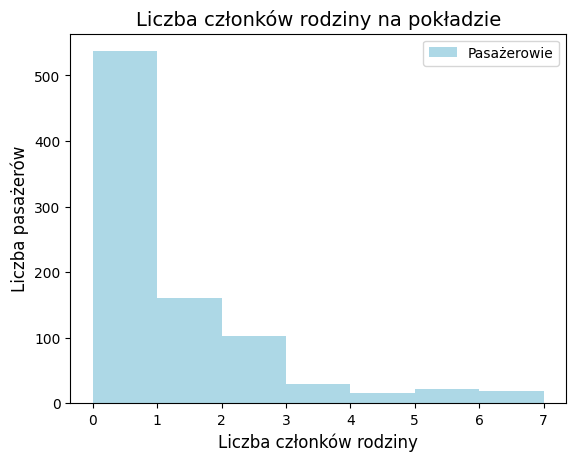

In [14]:
plt.hist(df["Liczba członków rodziny"],
         bins=range(0, 8),
         color="lightblue")
plt.title("Liczba członków rodziny na pokładzie", fontsize=14)
plt.xlabel("Liczba członków rodziny", fontsize=12)
plt.ylabel("Liczba pasażerów", fontsize=12)
plt.xticks(range(0, 8))
plt.legend(["Pasażerowie"], loc="upper right")

plt.show()

# Zadanie 3

# Zadanie 4